In [1]:
# distribuição de probabilidade

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv("train.csv")

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_titanic["Age"].describe()  # valores da variavel aleatoria distribuidos

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

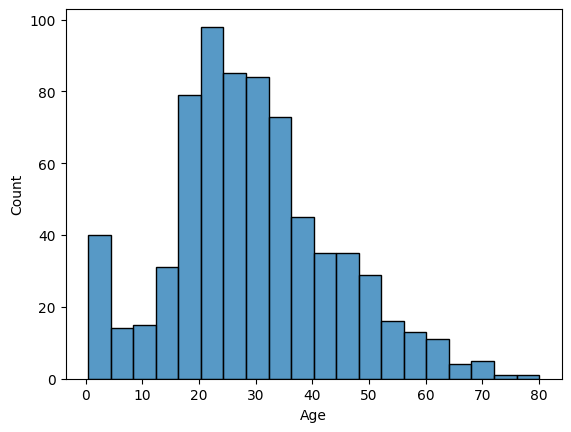

In [4]:
sns.histplot(data=df_titanic, x="Age")   # visão frequentista

<Axes: xlabel='Age', ylabel='Density'>

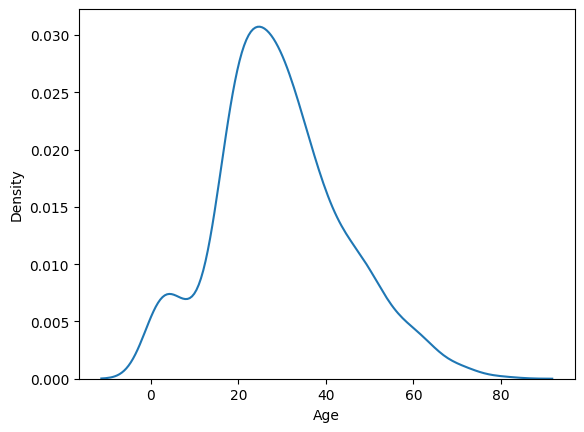

In [5]:
sns.kdeplot(data=df_titanic, x="Age")  # estimativa de densidade do kernel (densidade de probabilidade)

In [8]:
# distribuição de bernoulli

import scipy

In [10]:
resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size=100)

pd.Series(resultado_ber).value_counts(normalize=True)

0    0.51
1    0.49
Name: proportion, dtype: float64

In [11]:
df_titanic["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

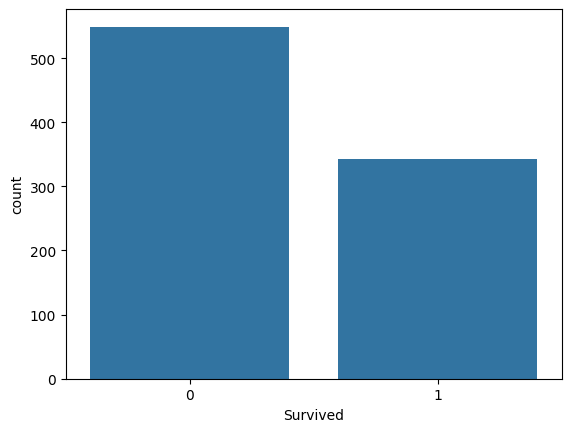

In [12]:
sns.countplot(data=df_titanic, x="Survived")

In [13]:
df_titanic["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [14]:
# distribuição de poisson

# exemplo: um restaurante recebe em media 20 pedidos por hora. Qual a chance de que em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

l = 20  # numero medio de ocorrencia por hora

k = 15  # numero a ser obtido no periodo

In [19]:
import math

p_15 = (np.exp(-l)*(l**k))/math.factorial(k)

f"{p_15:.2%}"

'5.16%'

In [21]:
scipy.stats.poisson.pmf(k=k, mu=l)*100

5.164885353175814

In [39]:
experimento = {
    "numero de ligações": [],
    "probabilidade": []
}

In [40]:
k_list = range(30)

for k in k_list:

    p = scipy.stats.poisson.pmf(k=k, mu=l)

    experimento["numero de ligações"].append(k)
    experimento["probabilidade"].append(f"{p:.9%}")

In [41]:
experimento

{'numero de ligações': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'probabilidade': ['0.000000206%',
  '0.000004122%',
  '0.000041223%',
  '0.000274820%',
  '0.001374102%',
  '0.005496410%',
  '0.018321366%',
  '0.052346759%',
  '0.130866897%',
  '0.290815326%',
  '0.581630652%',
  '1.057510276%',
  '1.762517127%',
  '2.711564810%',
  '3.873664015%',
  '5.164885353%',
  '6.456106691%',
  '7.595419637%',
  '8.439355152%',
  '8.883531739%',
  '8.883531739%',
  '8.460506418%',
  '7.691369471%',
  '6.688147366%',
  '5.573456139%',
  '4.458764911%',
  '3.429819162%',
  '2.540606787%',
  '1.814719133%',
  '1.251530437%']}

In [42]:
df_experimento = pd.DataFrame(experimento)

df_experimento

,numero de ligações,probabilidade
0,0,0.000000206%
1,1,0.000004122%
2,2,0.000041223%
3,3,0.000274820%
4,4,0.001374102%
5,5,0.005496410%
6,6,0.018321366%
7,7,0.052346759%
8,8,0.130866897%
9,9,0.290815326%


In [13]:
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

l = 3

experimento1 = {
    "numero de gols": [],
    "probabilidade": []
}

k_list = range(15)

for k in k_list:

    p = scipy.stats.poisson.pmf(k=k, mu=1)

    experimento1["numero de gols"].append(k)
    experimento1["probabilidade"].append(p)


df_experimento1 = pd.DataFrame(experimento1)
df_experimento1["p_formatado"] = df_experimento1["probabilidade"].apply(lambda x: f"{x:.9%}")
df_experimento1["p_acum"] = df_experimento1["probabilidade"].cumsum().apply(lambda x: f"{x:.9%}")

In [14]:
df_experimento1

,numero de gols,probabilidade,p_formatado,p_acum
0,0,3.678794e-01,36.787944117%,36.787944117%
1,1,3.678794e-01,36.787944117%,73.575888234%
2,2,1.839397e-01,18.393972059%,91.969860293%
3,3,6.131324e-02,6.131324020%,98.101184312%
4,4,1.532831e-02,1.532831005%,99.634015317%
5,5,3.065662e-03,0.306566201%,99.940581518%
6,6,5.109437e-04,0.051094367%,99.991675885%
7,7,7.299195e-05,0.007299195%,99.998975080%
8,8,9.123994e-06,0.000912399%,99.999887480%
9,9,1.013777e-06,0.000101378%,99.999988857%


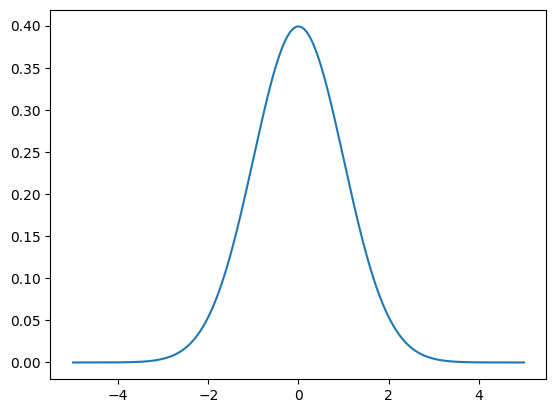

In [12]:
# distribuição normal (gaussiana)

import numpy as np
import matplotlib.pyplot as plt

m, s = 0, 1

x = np.linspace(-5, 5, 100000)

y = (1/(s*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-m)/s)**2)

plt.plot(x, y)

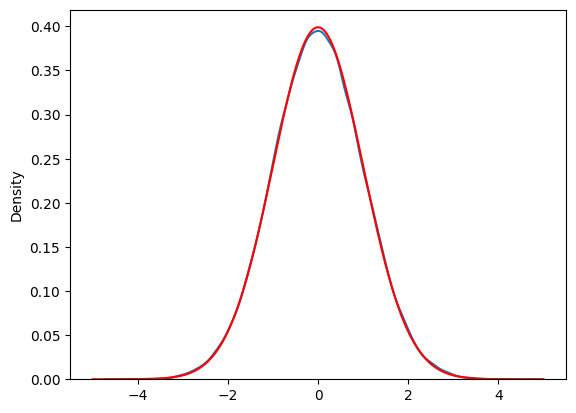

In [16]:
import seaborn as sns

m, s = 0, 1 
dados = np.random.normal(m, s, 100000)

sns.kdeplot(dados)

x = np.linspace(-5, 5, 100000)

y = (1/(s*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-m)/s)**2)

plt.plot(x, y, color="red")
